<a href="https://colab.research.google.com/github/deep-son/California-Housing-Price-Prediction/blob/master/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics 


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


In [3]:
!unzip 24824_33185_bundle_archive.zip

Archive:  24824_33185_bundle_archive.zip
  inflating: anscombe.csv            
  inflating: housing.csv             


In [104]:
house_df_main = pd.read_csv('housing.csv')
house_df = house_df_main.copy()

In [105]:
house_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [106]:
house_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [107]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [108]:
house_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [109]:
house_df.fillna(house_df.mean(), inplace=True)

In [110]:
house_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

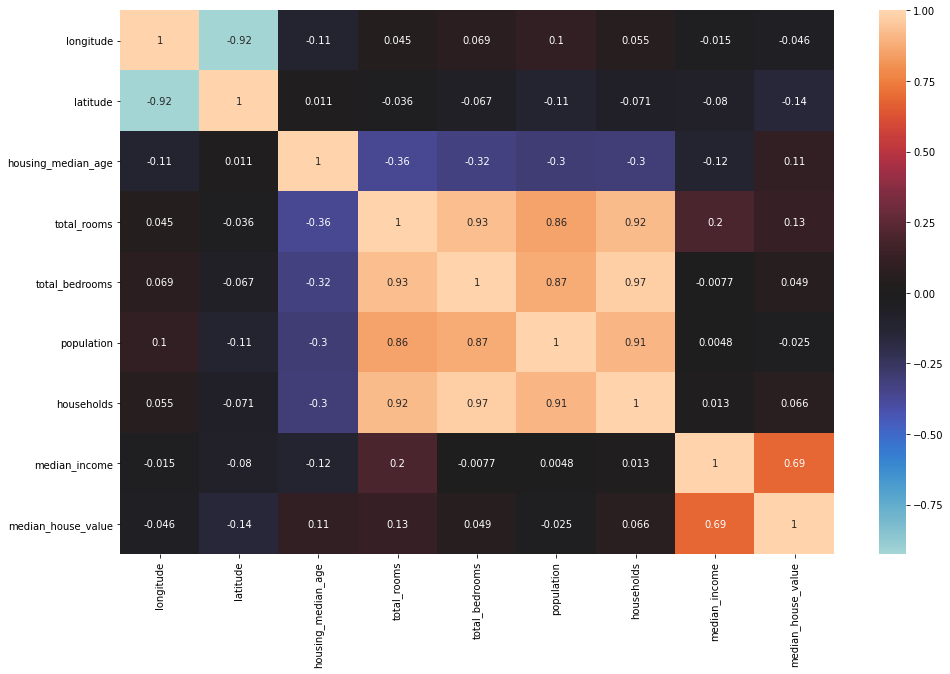

In [111]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(house_df.corr(),annot=True,center=0 )

##Worst Model

In [30]:
#worst model
wm_data = house_df.copy()
wmY = wm_data['median_house_value']
wm_data.drop(columns=['ocean_proximity','median_house_value'],inplace=True)
wmX_train, wmX_test, wmy_train, wmy_test = train_test_split(wm_data, wmY, test_size=0.2, random_state=1)


In [31]:
model = linear_model.LinearRegression()
model.fit(wmX_train, wmy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
wmy_pred = model.predict(wmX_test)

In [33]:
print(metrics.mean_squared_error(wmy_test, wmy_pred))
print(np.sqrt(metrics.mean_squared_error(wmy_test, wmy_pred)))

4882042980.068123
69871.6178435001


##Exploring data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f640cb1add8>,
      dtype=object)

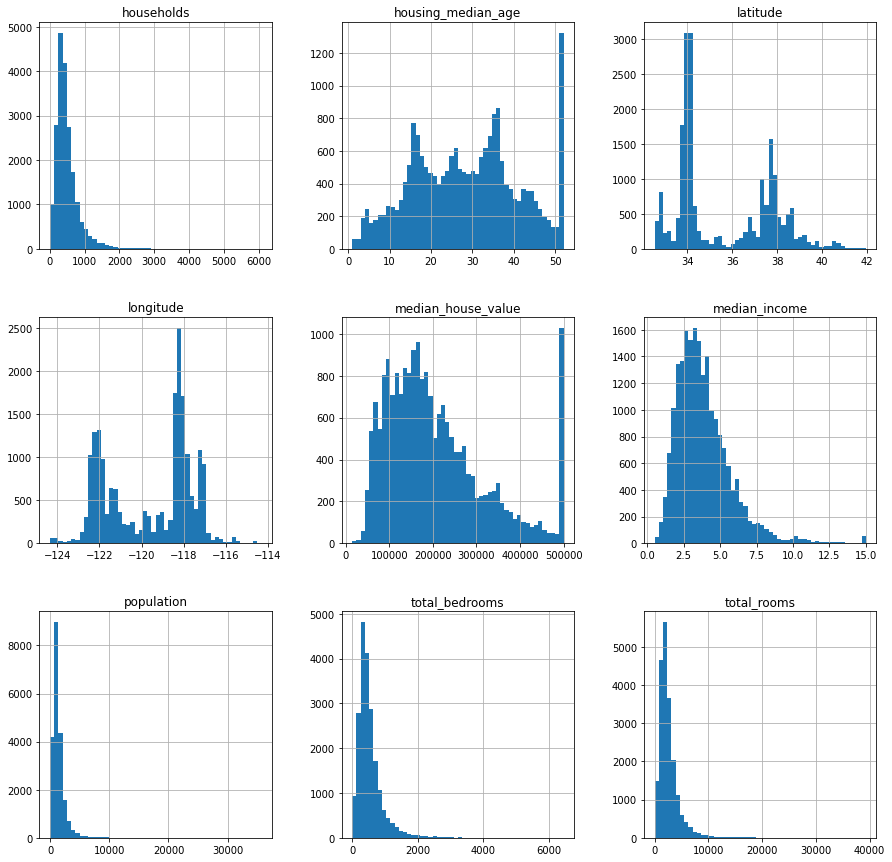

In [34]:
house_df.hist(bins=50, figsize=(15, 15))

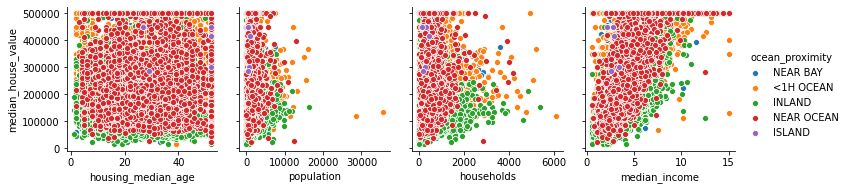

In [112]:
sns.pairplot(house_df, x_vars=['housing_median_age', 'population', 'households', 'median_income'],y_vars ='median_house_value',hue = 'ocean_proximity')

In [113]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

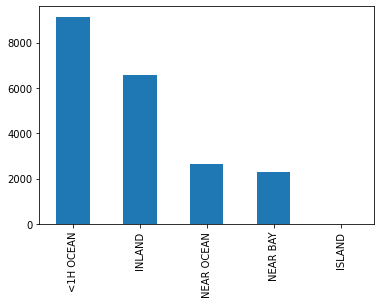

In [36]:
house_df['ocean_proximity'].value_counts().plot(kind='bar')

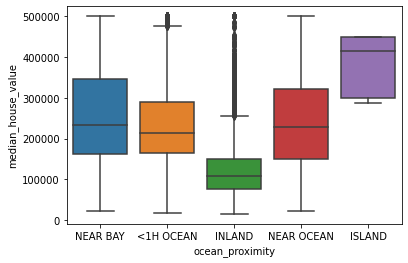

In [539]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=house_df)

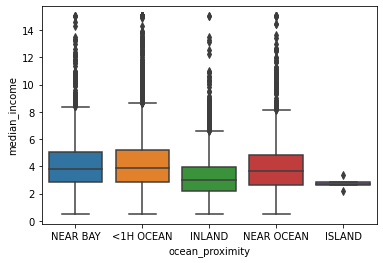

In [540]:
sns.boxplot(x="ocean_proximity", y="median_income", data=house_df)

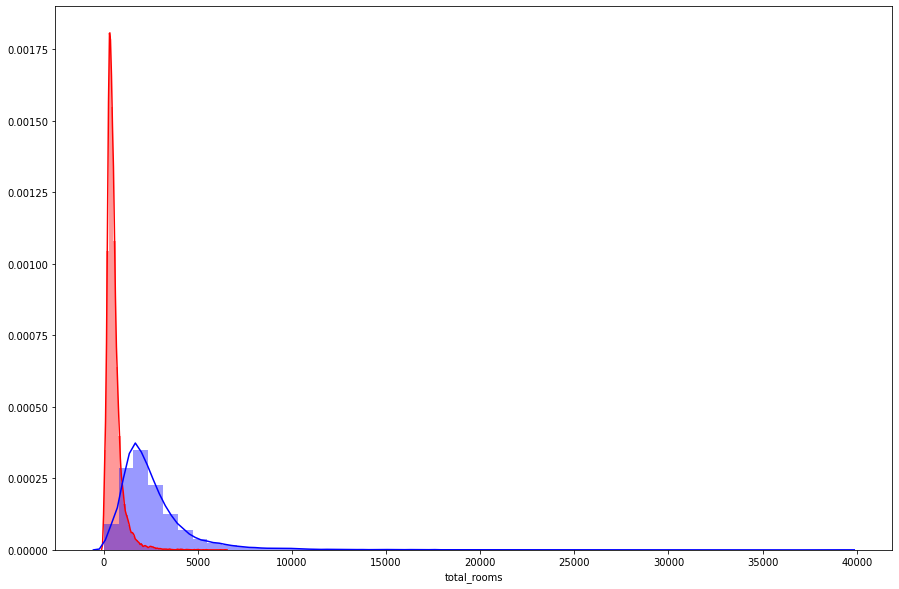

In [114]:
plt.figure(figsize=(15,10))
sns.distplot(house_df['total_bedrooms'],color='red')
sns.distplot(house_df['total_rooms'],color='blue')
plt.show()

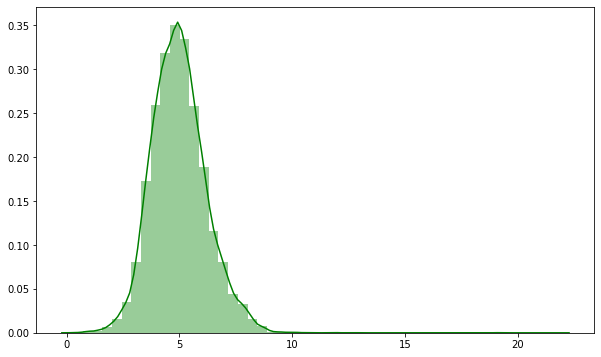

In [116]:
plt.figure(figsize=(10,6))
sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')
plt.show()

In [117]:
house_df['room_bed'] = (house_df['total_rooms']/house_df['total_bedrooms'])

In [118]:
house_df['room_bed']

0        6.821705
1        6.418626
2        7.721053
3        5.421277
4        5.810714
           ...   
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: room_bed, Length: 20640, dtype: float64

In [119]:
house_df1 = house_df.copy()
house_df1 = house_df1.loc[ house_df1['room_bed']<10.0]

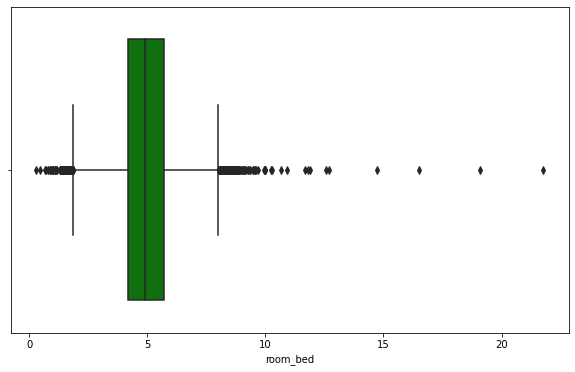

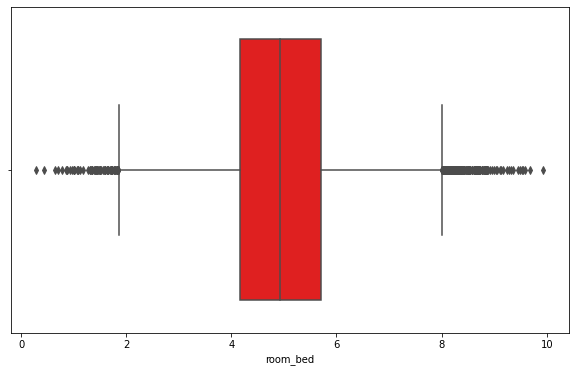

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(house_df['room_bed'],color='green',)

plt.figure(figsize=(10,6))
sns.boxplot(house_df1['room_bed'],color='red')

plt.show()

In [121]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20623 non-null  float64
 1   latitude            20623 non-null  float64
 2   housing_median_age  20623 non-null  float64
 3   total_rooms         20623 non-null  float64
 4   total_bedrooms      20623 non-null  float64
 5   population          20623 non-null  float64
 6   households          20623 non-null  float64
 7   median_income       20623 non-null  float64
 8   median_house_value  20623 non-null  float64
 9   ocean_proximity     20623 non-null  object 
 10  room_bed            20623 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


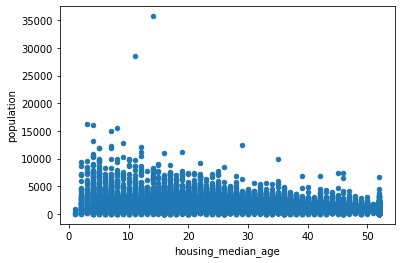

In [122]:

house_df1.plot.scatter(x='housing_median_age', y='population')


In [123]:
house_df1 = house_df1.loc[ house_df['population']<20000]

In [124]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20621 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20621 non-null  float64
 1   latitude            20621 non-null  float64
 2   housing_median_age  20621 non-null  float64
 3   total_rooms         20621 non-null  float64
 4   total_bedrooms      20621 non-null  float64
 5   population          20621 non-null  float64
 6   households          20621 non-null  float64
 7   median_income       20621 non-null  float64
 8   median_house_value  20621 non-null  float64
 9   ocean_proximity     20621 non-null  object 
 10  room_bed            20621 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


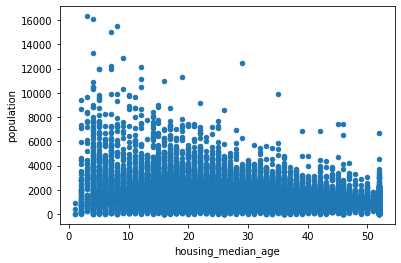

In [125]:
house_df1.plot.scatter(x='housing_median_age', y='population')

In [126]:
house_df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_bed'],
      dtype='object')

In [48]:
# house_df1['log_housing_median_age'] = np.log(house_df1['housing_median_age'])

In [49]:
# house_df1['log2_housing_median_age'] = np.log2(house_df1['housing_median_age'])
# house_df1['log10_housing_median_age'] = np.log10(house_df1['housing_median_age'])

In [50]:
# house_df1['lat_long'] = house_df1['latitude'] + house_df1['longitude']

In [131]:
house_df1['house_pop'] = house_df1['households'] / house_df1['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6404455c88>,
      dtype=object)

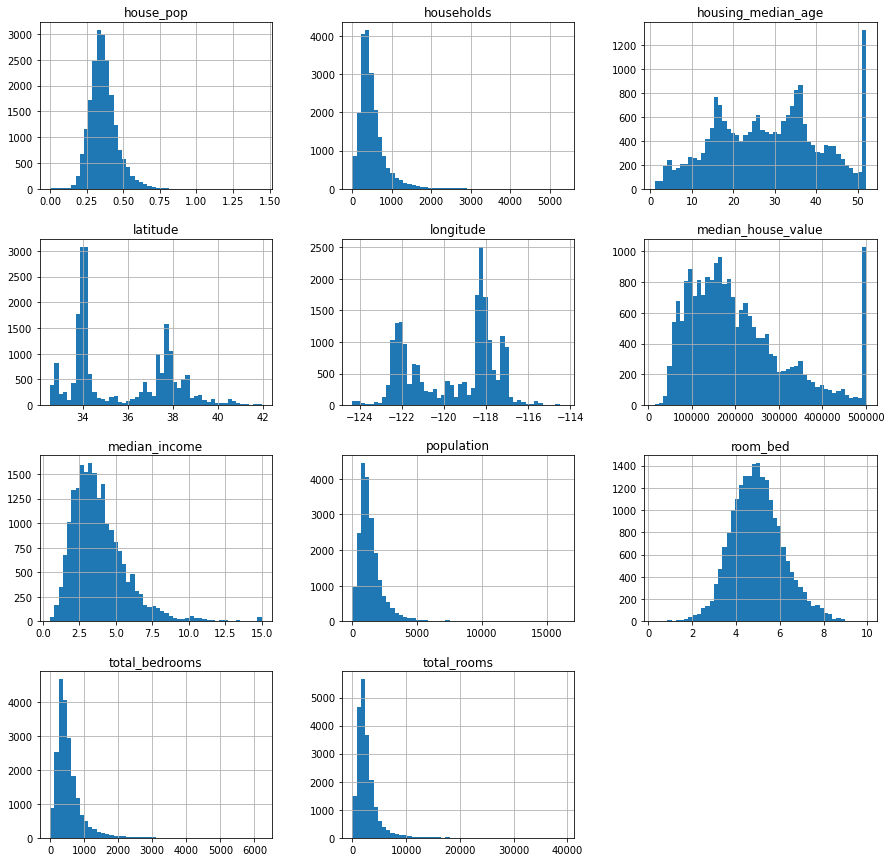

In [132]:
house_df1.hist(bins=50, figsize=(15, 15))

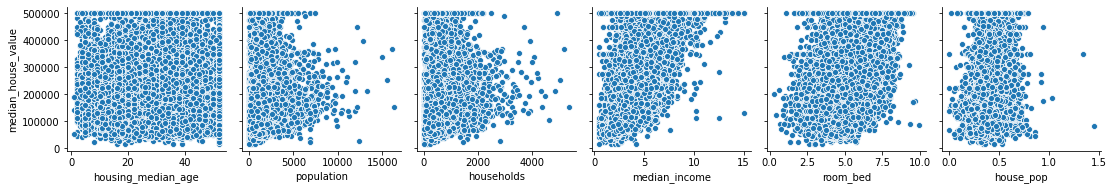

In [134]:
sns.pairplot(house_df1, x_vars=['housing_median_age', 'population', 'households', 'median_income',
       'room_bed','house_pop'],y_vars ='median_house_value')

(100,)

##Ploting Geographical Map

In [53]:
BBox = (house_df1.longitude.min(),   house_df1.longitude.max(),      
         house_df1.latitude.min(), house_df1.latitude.max())

In [54]:
BBox

(-124.35, -114.31, 32.54, 41.95)

In [55]:
ruh_m = plt.imread('./california.PNG')

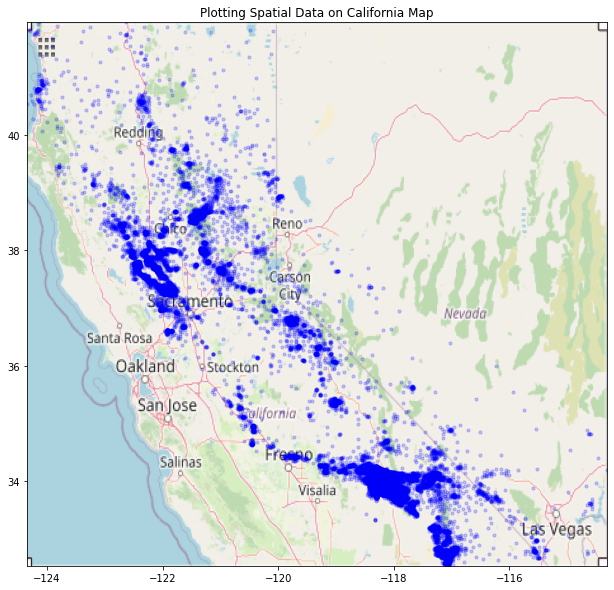

In [56]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(house_df1.longitude, house_df1.latitude, zorder=1, alpha= 0.2, c='blue', s=10)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [136]:
house_df1 = pd.get_dummies(house_df1,columns=['ocean_proximity'])


In [137]:
house_df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_bed', 'house_pop',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [148]:
#test model 1
m1_data = house_df1.copy()
m1Y = m1_data['median_house_value']
m1_data.drop(columns=['median_house_value','total_rooms',
       'total_bedrooms','population','households'],inplace=True)
m1_data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'room_bed', 'house_pop', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [149]:
m1X_train, m1X_test, m1y_train, m1y_test = train_test_split(m1_data, m1Y, test_size=0.2,random_state=1)

In [150]:
model1 = linear_model.LinearRegression()
model1.fit(m1X_train, m1y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
m1y_pred = model1.predict(m1X_test)
# m1y_pred_train = model1.predict(m1X_train)

In [152]:
print(metrics.mean_squared_error(m1y_test, m1y_pred))
print(np.sqrt(metrics.mean_squared_error(m1y_test, m1y_pred)))

4059997433.571254
63718.10914937176


array([-27450.62475338, -27129.58718409,    884.43329712,  40318.97657504,
        -5104.77793898, 314395.72387842, -24692.74901395, -60219.34486628,
       142231.78475777, -31745.48739844, -25574.2034791 ])

In [154]:
pd.DataFrame(zip(m1_data.columns,model1.coef_))

,0,1
0,longitude,-27450.624753
1,latitude,-27129.587184
2,housing_median_age,884.433297
3,median_income,40318.976575
4,room_bed,-5104.777939
5,house_pop,314395.723878
6,ocean_proximity_<1H OCEAN,-24692.749014
7,ocean_proximity_INLAND,-60219.344866
8,ocean_proximity_ISLAND,142231.784758
9,ocean_proximity_NEAR BAY,-31745.487398


In [585]:
house_df2 = house_df1.copy()
house_df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_bed', 'log_housing_median_age', 'house_pop',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [586]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
quantile = QuantileTransformer(output_distribution='normal')
quantile1 = QuantileTransformer(output_distribution='uniform')

In [587]:
new = house_df2['housing_median_age'].to_numpy()
data = new.reshape((len(new),1))

data_trans = power.fit_transform(data)
data_trans1 = quantile.fit_transform(data)
data_trans2 = quantile1.fit_transform(data)
house_df2['power_housing_median_age'] = pd.DataFrame(data_trans)
house_df2['quantile_housing_median_age'] = pd.DataFrame(data_trans1)
house_df2['uniform_housing_median_age'] = pd.DataFrame(data_trans2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2096b0ed30>,
      dtype=object)

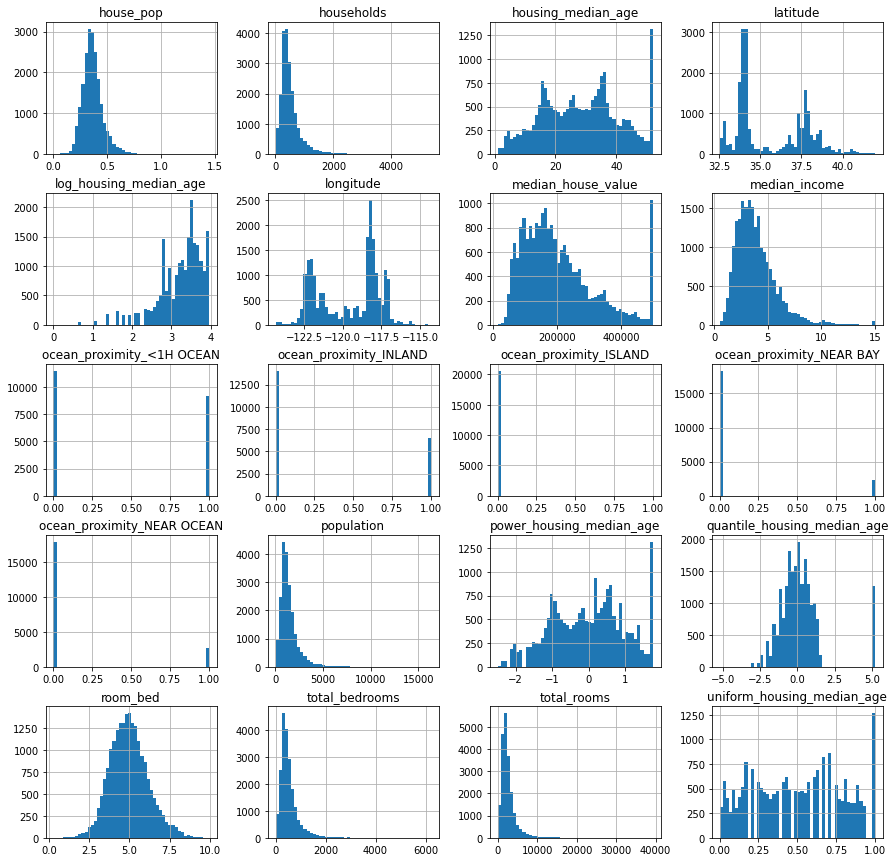

In [588]:
house_df2.hist(bins=50,figsize=(15, 15))

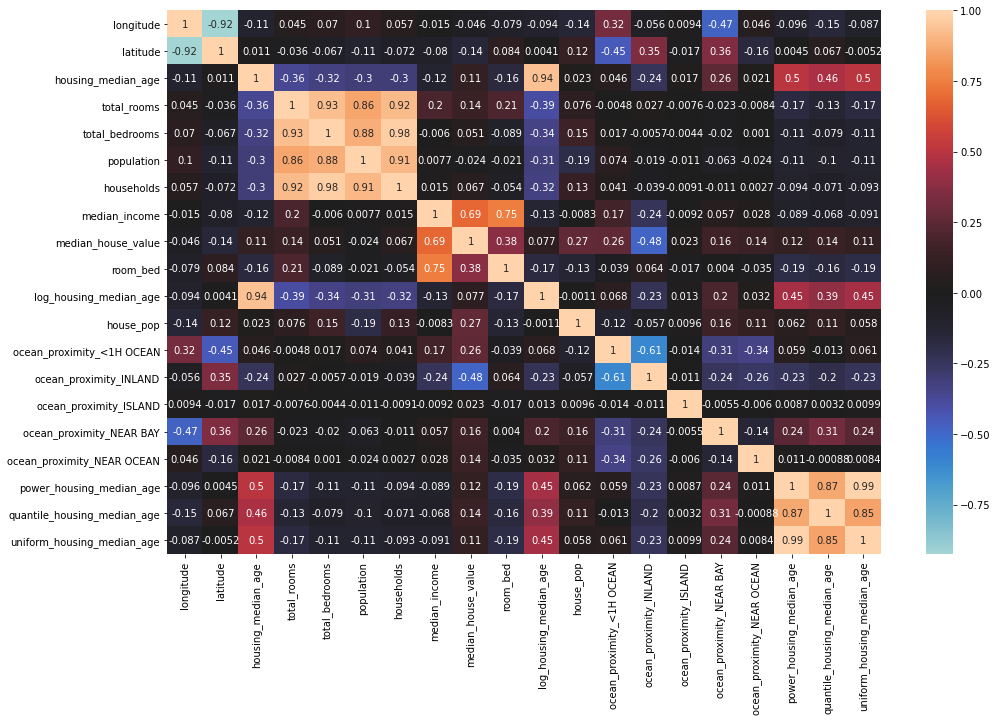

In [589]:
plt.figure(figsize = (16,10))
sns.heatmap(house_df2.corr(),annot=True,center=0 )

In [620]:
#test model 2
m2_data = house_df2.copy()
m2Y = m2_data['median_house_value']
m2_data.drop(columns=['median_house_value','longitude', 'latitude','total_rooms',
       'total_bedrooms','log_housing_median_age','population','households','power_housing_median_age','uniform_housing_median_age','housing_median_age'],inplace=True)
m2_data.columns



Index(['median_income', 'room_bed', 'house_pop', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'quantile_housing_median_age'],
      dtype='object')

In [621]:
m2_data.isnull().sum()

median_income                   0
room_bed                        0
house_pop                       0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
quantile_housing_median_age    19
dtype: int64

In [622]:
m2_data.fillna(m2_data.mean(),inplace=True)

In [623]:
m2X_train, m2X_test, m2y_train, m2y_test = train_test_split(m2_data, m2Y, test_size=0.2,random_state=1)

model2 = LinearRegression()
model2.fit(m2X_train, m2y_train)
m2y_pred = model2.predict(m2X_test)
print(mean_squared_error(m2y_test, m2y_pred))#med rms
print(mean_absolute_error(m2y_test, m2y_pred)) #med accuracy

4196169861.34914
47367.30443341427


In [626]:
model2_tree = DecisionTreeClassifier()
model2_tree.fit(m2X_train, m2y_train)
m2ytree_pred = model2_tree.predict(m2X_test)

# accuracy = accuracy_score(m2y_test, m2ytree_pred)
# print('Accuracy: %.2f' % (accuracy*100))
print(mean_squared_error(m2y_test, m2ytree_pred))
print(mean_absolute_error(m2y_test, m2ytree_pred))

7293584884.940122
58629.570424242425


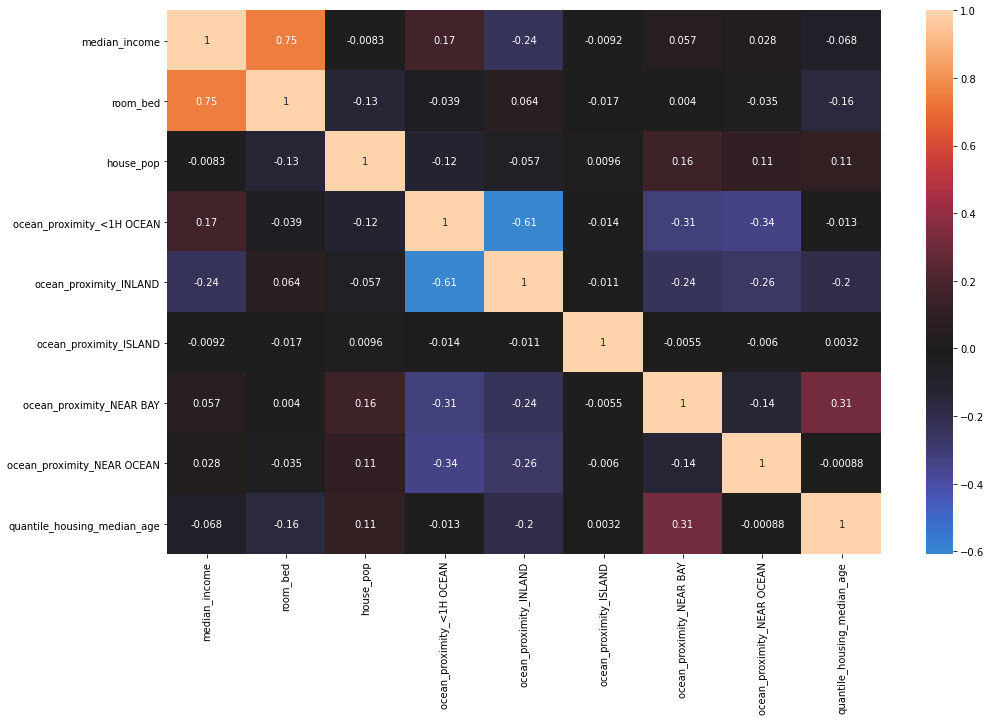

In [625]:
plt.figure(figsize = (16,10))
sns.heatmap(m2_data.corr(),annot=True,center=0 )

In [73]:
x = house_df[['housing_median_age']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
house_df[] = pd.DataFrame(x_scaled)

In [ ]:
# column_names_to_normalize = ['A', 'E', 'G', 'sadasdsd', 'lol']
# x = df[column_names_to_normalize].values
# x_scaled = min_max_scaler.fit_transform(x)
# df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
# df[column_names_to_normalize] = df_temp

In [74]:
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.784314,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,0.392157,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,1.000000,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,1.000000,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,1.000000,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,0.470588,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,0.333333,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,0.313725,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,0.333333,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


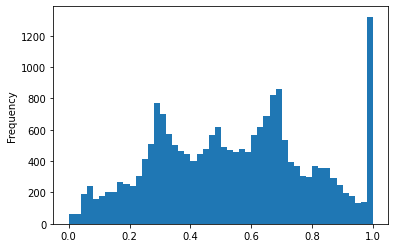

In [75]:
house_df['housing_median_age'].plot(kind = 'hist',bins=50)

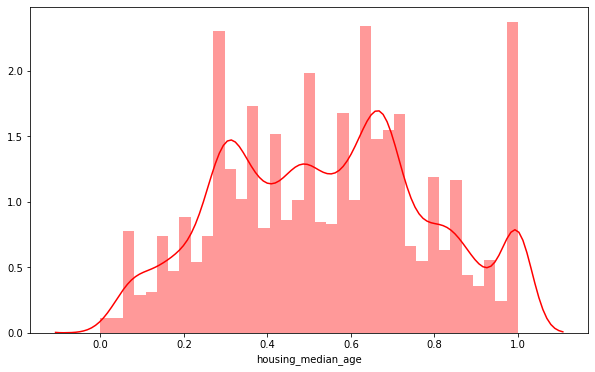

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(house_df,color='red')
plt.show()

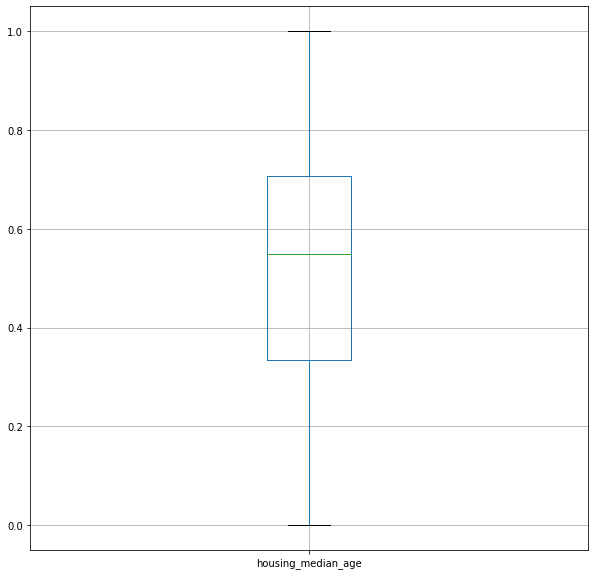

In [78]:

house_df.boxplot(['housing_median_age'], figsize=(10, 10))



In [ ]:
house_df['ocean_proximity'].value_counts()

In [ ]:
#test
room_df = house_df.loc[house_df[]]